In [1]:
import numpy as np
import soundfile as sf
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Audio
from librosa.feature import melspectrogram
from librosa.display import specshow
import librosa
import scipy

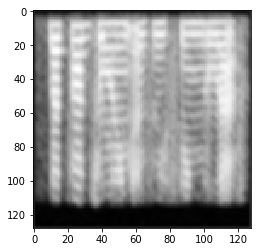

In [371]:
spec = scipy.misc.imread('../out/sp30.png')[:,:,0]
plt.imshow(spec, cmap='gray')

(129, 129)


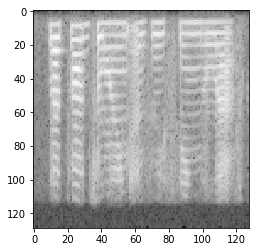

In [65]:
audio, sr = sf.read('../data/audio/clean/sp30.wav')
audio=audio[:16384]
freqs, bins, Sxx = scipy.signal.stft(audio, nfft=256, fs=sr, noverlap=128)
angle = np.angle(Sxx)
Sxx = np.abs(Sxx)
print(Sxx.shape)
plt.imshow(np.log10(Sxx[:,:-1]), cmap='gray')

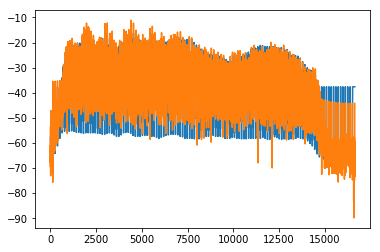

In [372]:
# s = spec / -2.83
s = spec.copy()
s = np.vstack((s, np.full(128, spec.mean())))
s = np.hstack((s, np.full((129,1), spec.mean())))
s = (s/5 - 67)

p = 10*np.log10(Sxx)

plt.plot(s.flatten())
plt.plot(p.flatten())

# plt.plot((p-s).flatten())

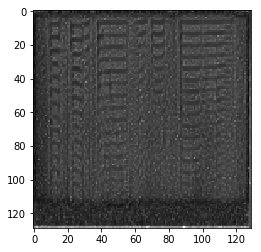

In [373]:
plt.imshow(s-p,cmap='gray')

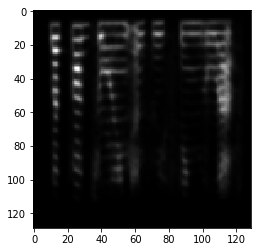

In [374]:
plt.imshow(np.power(10, s/10), cmap='gray')

In [375]:
audio, sr = sf.read('../data/audio/car_10dB/sp30_car_sn10.wav')
Audio(audio, rate=sr)

In [378]:
t, x = scipy.signal.istft(np.power(10, s/10), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)

In [377]:
t, x = scipy.signal.istft(Sxx * np.exp(1j * angle), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)